## Final Project Submission

Please fill out:
* Student name: **Dennis Trimarchi**
* Student pace: **full time**
* Scheduled project review date/time: **Not yet scheduled**
* Instructor name: **Rafael Cassaro**
* Blog post URL: **Not yet created**


This file:
**Student_2_Questions.jpynb**


## Questions

When I initially looked at the data during the Data Scrubbing phase, I thought about the following questions:

1. Are waterfront properties significantly more expensive than non-waterfront?
2. Are newer homes more expensive (yr_built)?
3. What impacts price more, square footage of living space or number of bedrooms?

### Import a bunch of libraries

There are a bunch of libraries that are used in this project. They are imported and aliased below.

In [1]:
#Datarames and Computation
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
#contexts available: poster, paper, talk, notebook
sns.set_context('paper')

#STATSMODELS

#statistical analysis & regression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

#SCIKIT LEARN

#metrics
#from sklearn.metrics import mean_squared_error

#linear regression
#from sklearn.linear_model import LinearRegression
#linreg = LinearRegression()

#label encoding
#from sklearn.preprocessing import LabelEncoder
#lb_make = LabelEncoder()

#create dummy variables
#from sklearn.preprocessing import LabelBinarizer
#lb_bin = LabelBinarizer()

#recursive feature elimination
#from sklearn.feature_selection import RFE

#train test split
#from sklearn.model_selection import train_test_split

#k-fold cross validation
#from sklearn.model_selection import cross_val_score

#PICKLE for saving objects
import pickle

#### Read in DataFrame from pickle file

In [23]:
with open('data.pickle','rb') as f:
    data = pickle.load(f)
    
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_981,has_basement
count,2.096300e+04,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000
mean,5.154048e+05,3.355102,2.108858,2032.599389,10750.234270,1.488360,0.004675,3.411153,7.614607,1749.281925,1970.785384,1972.678338,98078.731384,47.560797,-122.217000,1962.964080,9979.023184,0.423365,0.383247
std,2.830298e+05,0.879990,0.728166,834.998842,13638.141655,0.539631,0.068215,0.649884,1.119503,769.590305,29.371643,28.971475,53.656112,0.138196,0.138392,662.339591,11795.111734,0.494104,0.486189
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000,0.000000,0.000000
25%,3.200000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,3.000000,7.000000,1180.000000,1951.000000,1954.000000,98033.000000,47.472750,-122.330000,1480.000000,5054.000000,0.000000,0.000000
50%,4.470000e+05,3.000000,2.000000,1890.000000,7500.000000,1.500000,0.000000,3.000000,7.000000,1540.000000,1974.000000,1977.000000,98070.000000,47.571900,-122.235000,1820.000000,7536.000000,0.000000,0.000000
75%,6.300000e+05,4.000000,2.500000,2500.000000,10275.000000,2.000000,0.000000,4.000000,8.000000,2160.000000,1996.000000,1998.000000,98118.000000,47.678850,-122.129000,2330.000000,9870.000000,1.000000,1.000000
max,1.990000e+06,7.000000,5.000000,5990.000000,149410.000000,3.500000,1.000000,5.000000,13.000000,5990.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,149410.000000,1.000000,1.000000


Pickle is amazing I must say.

### Question 1 - Waterfront Property

Are waterfront properties significantly more expensive than non-waterfront?

Unfortunately, when I thought of this question, I did not realize that the DataFrame would contain so few records for waterfront property. I am not going to use this field in my model as a result, but I will do some analysis here for the sake of the question.

In [50]:
#create dataFrame with only waterfront and price
waterfront_df = data.loc[:,['waterfront', 'price']]

In [51]:
waterfront_df.corr()

,waterfront,price
waterfront,1.000000,0.145956
price,0.145956,1.000000


Looks like a weak positive correlation with waterfront. Again, the records marked as waterfrot are very little. So, this is more of an exercise to see what we get.

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


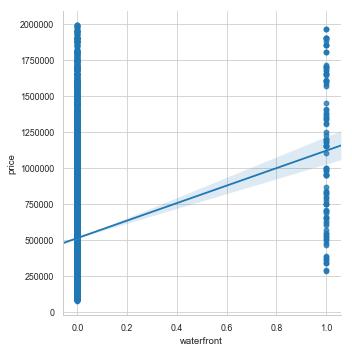

In [52]:
sns.lmplot('waterfront','price',waterfront_df)

Median
waterfront
0     445000.0
1    1150000.0
Name: price, dtype: float64

Count
waterfront
0    20865
1       98
Name: price, dtype: int64


/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


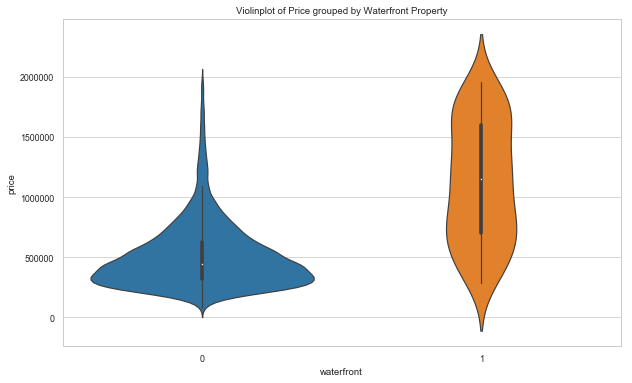

In [53]:
plt.figure(figsize=(10,6))
sns.violinplot(x='waterfront',y='price',data=waterfront_df)
plt.title("Violinplot of Price grouped by Waterfront Property")
print("Median")
print(waterfront_df.groupby('waterfront')['price'].median())
print("\nCount")
print(waterfront_df.groupby('waterfront')['price'].count())

It's a cool looking plot. Waterfront property skews higher in price.

Will run a quick ols regression to see what the regression results are:

In [54]:
#OLS Regression
f = 'price~waterfront'
model = ols(formula=f, data=waterfront_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     456.3
Date:                Fri, 31 May 2019   Prob (F-statistic):          3.67e-100
Time:                        22:10:35   Log-Likelihood:            -2.9267e+05
No. Observations:               20963   AIC:                         5.854e+05
Df Residuals:                   20961   BIC:                         5.854e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.126e+05   1938.463    264.423      0.000    5.09e+05    5.16e+05
waterfront  6.056e+05   2.84e+04     21.360      0.000     5.5e+05    6.61e+05
==============================================================================
Omnibus:                     7020.274   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24274.495
Skew:                           1.694   Prob(JB):                         0.00
Kurtosis:                       7.039   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

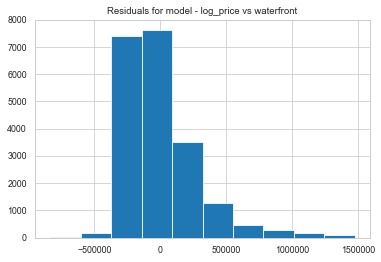

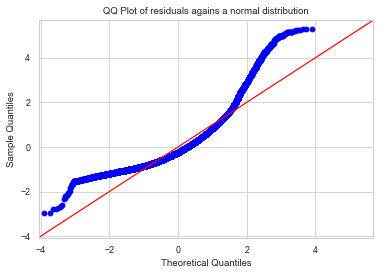

In [55]:
#Show a histogram of the residuals
model.resid.hist()
plt.title("Residuals for model - log_price vs waterfront")
plt.show()

#show a QQ plot
fig2 = sm.graphics.qqplot(model.resid,dist=stats.norm,line='45',fit=True)
plt.title("QQ Plot of residuals agains a normal distribution")
plt.show()

Hmmm. I hate how non-normally distributed my residuals are. I'll try taking the log of the dependent variable "price" to see if it makes a difference.

## Running regression again but with log_price vs. waterfront

In [56]:
waterfront_df['log_price'] = np.log(waterfront_df['price'])

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


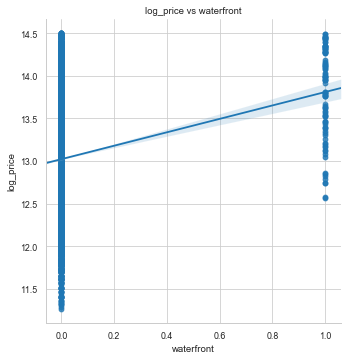

Median
waterfront
0    13.005830
1    13.955273
Name: log_price, dtype: float64

Count
waterfront
0    20865
1       98
Name: log_price, dtype: int64


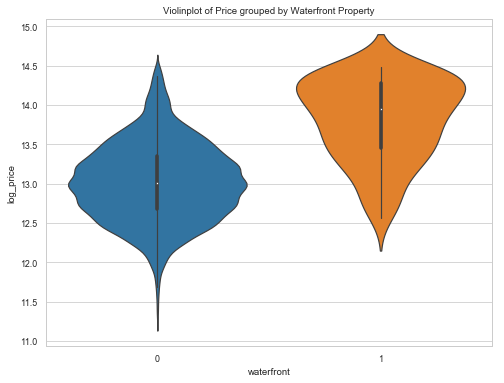

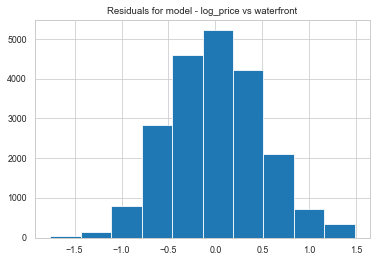

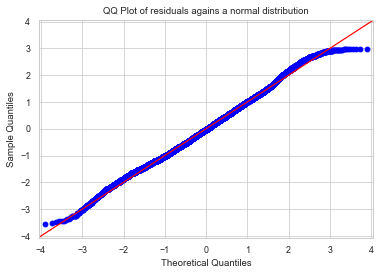

In [57]:
#Scatterplot with log_price 
sns.lmplot('waterfront','log_price',waterfront_df)
plt.title("log_price vs waterfront")
plt.show()

#Violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x='waterfront',y='log_price',data=waterfront_df)
plt.title("Violinplot of Price grouped by Waterfront Property")
print("Median")
print(waterfront_df.groupby('waterfront')['log_price'].median())
print("\nCount")
print(waterfront_df.groupby('waterfront')['log_price'].count())
plt.show()

#OLS Regression
f = 'log_price~waterfront'
model = ols(formula=f, data=waterfront_df).fit()

#Show a histogram of the residuals
plt.hist(model.resid)
plt.title("Residuals for model - log_price vs waterfront")
plt.show()
#fig1 = model.resid.hist()
#fig1.plot.title("Residuals for model - log_price vs waterfront")

#show a QQ plot
sm.graphics.qqplot(model.resid,dist=stats.norm,line='45',fit=True)
plt.title("QQ Plot of residuals agains a normal distribution")
plt.show()

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     247.4
Date:                Fri, 31 May 2019   Prob (F-statistic):           1.99e-55
Time:                        22:11:01   Log-Likelihood:                -15001.
No. Observations:               20963   AIC:                         3.001e+04
Df Residuals:                   20961   BIC:                         3.002e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0218      0.003   3800.271      0.000      13.015      13.028
waterfront     0.7883      0.050     15.729      0.000       0.690       0.886
==============================================================================
Omnibus:                       83.737   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.686
Skew:                           0.155   Prob(JB):                     4.08e-19
Kurtosis:                       2.971   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question 1 - Discussion / Answer

Waterfront view and price are positively correlated. 

The low p-value (0 in this case) indicates that the coefficient is statistically significant.

The coefficient would indicate that having a view of the waterfront results in an increase of 0.7883 for the log of the price (about $2.2K in value). I figured that it would be much higher, but the data does seem to support that waterfront is positively correlated for sure.

The R-squared is pretty awful (0.012). I suppose this makes perfect sense since home prices are based on many other things than just whether the property is waterfront.

## Question 2 - Newer Homes

2. Are newer homes more expensive?

For this, I will have to look at the yr_built field.

In [59]:
#create dataFrame with only yr_built and price
yr_built_df = data.loc[:,['yr_built', 'price']]

In [60]:
yr_built_df.corr()

,yr_built,price
yr_built,1.000000,0.053003
price,0.053003,1.000000


Year built is hardly correlated with price at all. Looks to be that newer homes are not more expensive... or at the very least they are very weakly positively correlated with price.

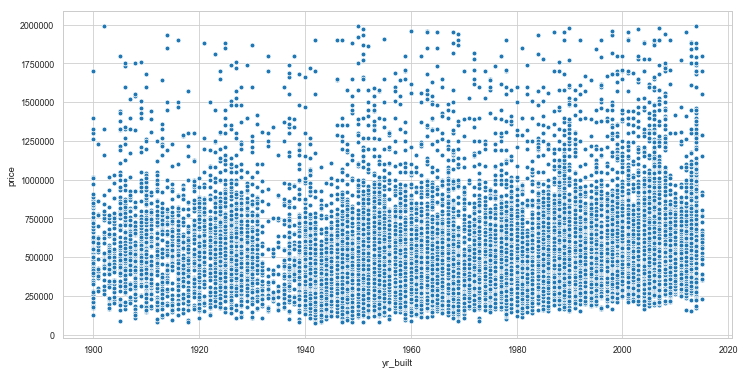

In [78]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=yr_built_df['yr_built'], y=yr_built_df['price'])
plt.show()

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x432 with 0 Axes>

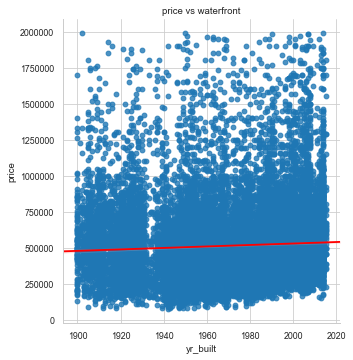

In [79]:
#Scatterplot with log_price 
plt.figure(figsize=(12,6))
sns.lmplot('yr_built','price',yr_built_df, line_kws={'color': 'red'})
plt.title("price vs waterfront")
plt.show()

It doesn't really look like there is a strong relationship, a super-weak positive relationship. This goes along with the low correlation coefficient.

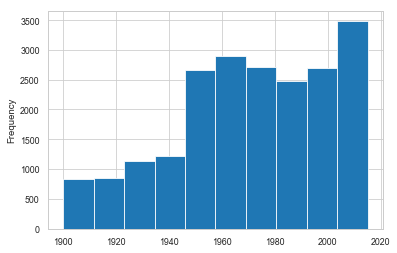

In [62]:
yr_built_df['yr_built'].plot.hist()

I didn't expect the distribution of homes by year to be a normal distribution. This is an expected distribution based on the city growing over the course of 120 years.

In [63]:
#TRy normalizing the data:

#Min Max Scaler
def min_max_scaler(X):
    """
    X is a NumPy array. Will return min-max scaled array from 0 to 1. 
    x' = x-min(x) / max(x)-min(x)
    """
    min_x = np.min(X)
    max_x = np.max(X)
    return (X - min_x) / (max_x - min_x)

Will run a quick OLS regression to see what pops out.

In [81]:
#OLS Regression
f = 'price~yr_built'
model = ols(formula=f, data=yr_built_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     59.05
Date:                Fri, 31 May 2019   Prob (F-statistic):           1.60e-14
Time:                        22:36:22   Log-Likelihood:            -2.9287e+05
No. Observations:               20963   AIC:                         5.857e+05
Df Residuals:                   20961   BIC:                         5.858e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.912e+05   1.31e+05     -3.749      0.000   -7.48e+05   -2.34e+05
yr_built     510.7476     66.464      7.685      0.000     380.473     641.022
==============================================================================
Omnibus:                     7279.048   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25885.181
Skew:                           1.751   Prob(JB):                         0.00
Kurtosis:                       7.169   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So surprisingly the p-value is zero.

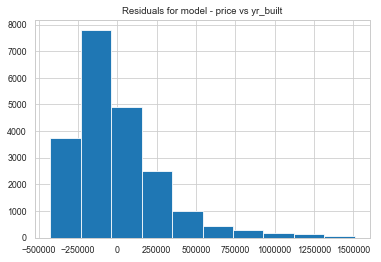

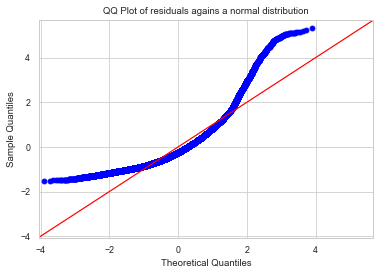

In [82]:
#Show a histogram of the residuals
plt.hist(model.resid)
plt.title("Residuals for model - price vs yr_built")
plt.show()
#fig1 = model.resid.hist()
#fig1.plot.title("Residuals for model - log_price vs waterfront")

#show a QQ plot
sm.graphics.qqplot(model.resid,dist=stats.norm,line='45',fit=True)
plt.title("QQ Plot of residuals agains a normal distribution")
plt.show()

## Running regression again but with log_price vs. yr_built

In [71]:
yr_built_df['log_price'] = np.log(yr_built_df['price'])

In [72]:
#OLS Regression
f = 'log_price~yr_built'
model = ols(formula=f, data=yr_built_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     115.9
Date:                Fri, 31 May 2019   Prob (F-statistic):           5.81e-27
Time:                        22:19:41   Log-Likelihood:                -15066.
No. Observations:               20963   AIC:                         3.014e+04
Df Residuals:                   20961   BIC:                         3.015e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5480      0.230     45.837      0.000      10.097      10.999
yr_built       0.0013      0.000     10.767      0.000       0.001       0.001
==============================================================================
Omnibus:                      134.835   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.131
Skew:                           0.196   Prob(JB):                     1.67e-30
Kurtosis:                       2.941   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

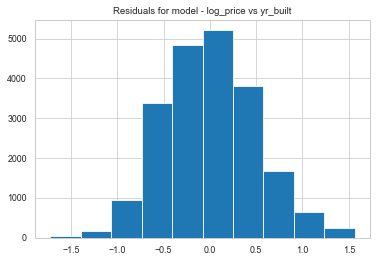

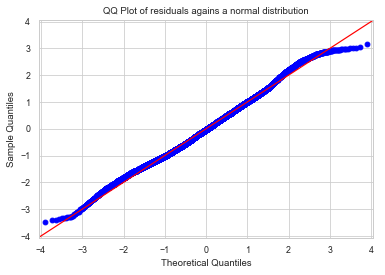

In [73]:
#Show a histogram of the residuals
plt.hist(model.resid)
plt.title("Residuals for model - log_price vs yr_built")
plt.show()
#fig1 = model.resid.hist()
#fig1.plot.title("Residuals for model - log_price vs waterfront")

#show a QQ plot
sm.graphics.qqplot(model.resid,dist=stats.norm,line='45',fit=True)
plt.title("QQ Plot of residuals agains a normal distribution")
plt.show()

## Question 3 - Square Footage of living space vs Num Bedrooms


3. What impacts price more, square footage of living space or number of bedrooms?

In [83]:
#create dataFrame with only waterfront and price
q3_df = data.loc[:,['sqft_living','bedrooms', 'price']]

In [84]:
q3_df.corr()

,sqft_living,bedrooms,price
sqft_living,1.000000,0.605054,0.671363
bedrooms,0.605054,1.000000,0.321556
price,0.671363,0.321556,1.000000


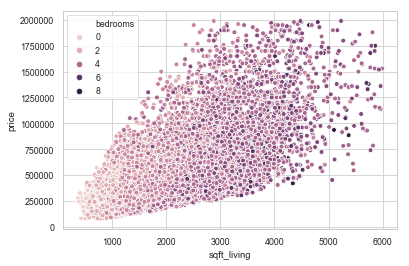

In [99]:
sns.scatterplot(x=q3_df['sqft_living'],y=q3_df['price'],hue=q3_df['bedrooms'])

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


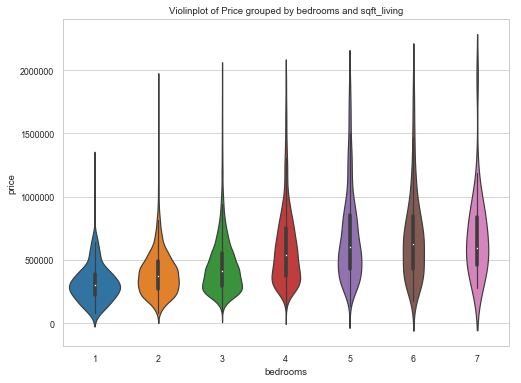

In [100]:
#Violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x='bedrooms',y='price',data=q3_df)
plt.title("Violinplot of Price grouped by bedrooms and sqft_living")
plt.show()